## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu",
                                   name="hidden_layer"+str(i+1))(x)
    
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = [0.7, 0.8, 0.9, 0.95, 1.0]
NESTEROV = [False, True]

In [9]:
results = {}

for m in MOMENTUM:
    keras.backend.clear_session()
    print('---------------------------------------------------')
    print("\nRun with momentum = %.2f" %(m))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=0.001, nesterov=True, momentum=m)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum-%s" % str(m)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

---------------------------------------------------

Run with momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.2133 - acc: 0.1925 - val_loss: 2.1214 - val_acc: 0.2490
Epoch 2/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.0654 - acc: 0.2711 - val_loss: 2.0162 - val_acc: 0.2903
Epoch 3/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9834 - acc: 0.2960 - val_loss: 1.9532 - val_acc: 0.3129
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9315 - acc: 0.3161 - val_loss: 1.9122 - val_acc: 0.3313
Epoch 5/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8960 - acc: 0.3303 - val_loss: 1.8810 - val_acc: 0.3415
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8683 - acc: 0.3422 - val_loss: 1.8564 - val_acc: 0.3485
Epoch 7/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.8457 - acc: 0.3514 - val_loss: 1.8368 - val_acc

Epoch 2/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.9805 - acc: 0.3004 - val_loss: 1.9259 - val_acc: 0.3207
Epoch 3/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.8885 - acc: 0.3384 - val_loss: 1.8607 - val_acc: 0.3504
Epoch 4/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8343 - acc: 0.3594 - val_loss: 1.8182 - val_acc: 0.3617
Epoch 5/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7952 - acc: 0.3753 - val_loss: 1.7868 - val_acc: 0.3764
Epoch 6/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7647 - acc: 0.3868 - val_loss: 1.7547 - val_acc: 0.3894
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7384 - acc: 0.3949 - val_loss: 1.7346 - val_acc: 0.3956
Epoch 8/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7164 - acc: 0.4032 - val_loss: 1.7103 - val_acc: 0.4016
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 3s 51us/step - loss: 1.8451 - acc: 0.3497 - val_loss: 1.8175 - val_acc: 0.3601
Epoch 4/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7870 - acc: 0.3711 - val_loss: 1.7704 - val_acc: 0.3715
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7400 - acc: 0.3881 - val_loss: 1.7206 - val_acc: 0.3944
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.7006 - acc: 0.4041 - val_loss: 1.6902 - val_acc: 0.4054
Epoch 7/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6680 - acc: 0.4127 - val_loss: 1.6577 - val_acc: 0.4144
Epoch 8/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6404 - acc: 0.4239 - val_loss: 1.6316 - val_acc: 0.4265
Epoch 9/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6145 - acc: 0.4329 - val_loss: 1.6099 - val_acc: 0.4343
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 51us/step - loss: 1.7309 - acc: 0.3917 - val_loss: 1.7131 - val_acc: 0.3942
Epoch 5/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6769 - acc: 0.4093 - val_loss: 1.6480 - val_acc: 0.4190
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6439 - acc: 0.4220 - val_loss: 1.6236 - val_acc: 0.4242
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6208 - acc: 0.4301 - val_loss: 1.6072 - val_acc: 0.4305
Epoch 8/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5954 - acc: 0.4373 - val_loss: 1.6072 - val_acc: 0.4315
Epoch 9/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5718 - acc: 0.4485 - val_loss: 1.5802 - val_acc: 0.4432
Epoch 10/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5439 - acc: 0.4568 - val_loss: 1.5527 - val_acc: 0.4500
Epoch 11/50
50000/50000 [==========================

In [27]:
results.keys()

dict_keys(['momentum-0.7', 'momentum-0.8', 'momentum-0.9', 'momentum-0.95', 'momentum-1.0'])

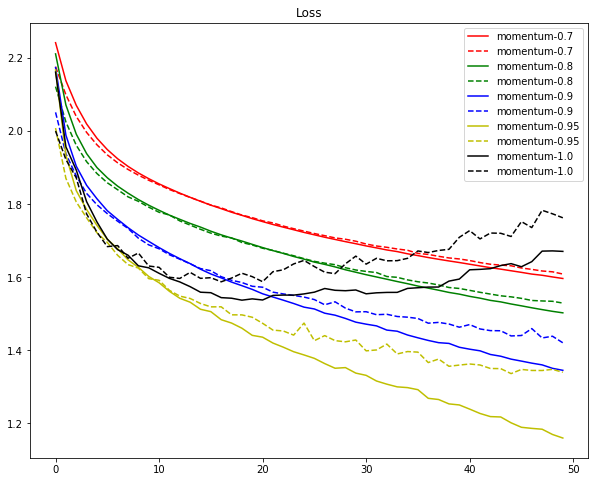

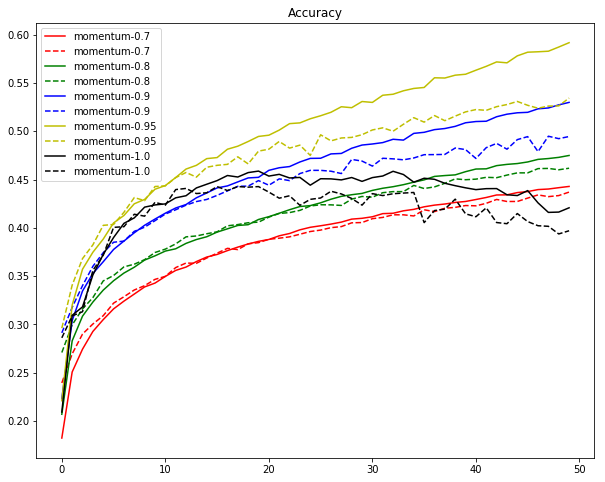

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y","k"]

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='best')
plt.show()

In [13]:
results_new = {}

for m in MOMENTUM:
    keras.backend.clear_session()
    print('---------------------------------------------------')
    print("\nRun with momentum = %.2f" %(m))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=0.001, nesterov=False, momentum=m)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum-%s" % str(m)
    results_new[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

---------------------------------------------------

Run with momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.2196 - acc: 0.1940 - val_loss: 2.1285 - val_acc: 0.2524
Epoch 2/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.0773 - acc: 0.2715 - val_loss: 2.0276 - val_acc: 0.2905
Epoch 3/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.9951 - acc: 0.3057 - val_loss: 1.9594 - val_acc: 0.3195
Epoch 4/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9378 - acc: 0.3247 - val_loss: 1.9133 - val_acc: 0.3372
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8978 - acc: 0.3394 - val_loss: 1.8780 - val_acc: 0.3427
Epoch 6/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.8680 - acc: 0.3513 - val_loss: 1.8537 - val_acc: 0.3534
Epoch 7/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8448 - acc: 0.3570 - val_loss: 1.8307 - val_acc

Epoch 2/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.9945 - acc: 0.3036 - val_loss: 1.9406 - val_acc: 0.3210
Epoch 3/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.9076 - acc: 0.3327 - val_loss: 1.8777 - val_acc: 0.3443
Epoch 4/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8544 - acc: 0.3500 - val_loss: 1.8375 - val_acc: 0.3641
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8175 - acc: 0.3645 - val_loss: 1.8001 - val_acc: 0.3715
Epoch 6/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7851 - acc: 0.3770 - val_loss: 1.7736 - val_acc: 0.3766
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7589 - acc: 0.3870 - val_loss: 1.7501 - val_acc: 0.3857
Epoch 8/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.7367 - acc: 0.3935 - val_loss: 1.7287 - val_acc: 0.3948
Epoch 9/50
50000/50000 [=================

50000/50000 [==============================] - 2s 50us/step - loss: 1.8181 - acc: 0.3639 - val_loss: 1.7918 - val_acc: 0.3725
Epoch 4/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7653 - acc: 0.3826 - val_loss: 1.7375 - val_acc: 0.3935
Epoch 5/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7291 - acc: 0.3960 - val_loss: 1.7084 - val_acc: 0.4010
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6976 - acc: 0.4066 - val_loss: 1.6741 - val_acc: 0.4150
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.6668 - acc: 0.4182 - val_loss: 1.6606 - val_acc: 0.4145
Epoch 8/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.6433 - acc: 0.4258 - val_loss: 1.6354 - val_acc: 0.4261
Epoch 9/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.6186 - acc: 0.4325 - val_loss: 1.6063 - val_acc: 0.4383
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 3s 50us/step - loss: 1.8159 - acc: 0.3438 - val_loss: 1.7620 - val_acc: 0.3713
Epoch 5/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.7603 - acc: 0.3694 - val_loss: 1.7492 - val_acc: 0.3719
Epoch 6/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7403 - acc: 0.3781 - val_loss: 1.7296 - val_acc: 0.3848
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7408 - acc: 0.3774 - val_loss: 1.7082 - val_acc: 0.3923
Epoch 8/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7207 - acc: 0.3874 - val_loss: 1.7244 - val_acc: 0.3828
Epoch 9/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.7107 - acc: 0.3914 - val_loss: 1.6682 - val_acc: 0.4023
Epoch 10/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.6787 - acc: 0.4038 - val_loss: 1.6811 - val_acc: 0.4063
Epoch 11/50
50000/50000 [==========================

In [28]:
results_new.keys()

dict_keys(['momentum-0.7', 'momentum-0.8', 'momentum-0.9', 'momentum-0.95', 'momentum-1.0'])

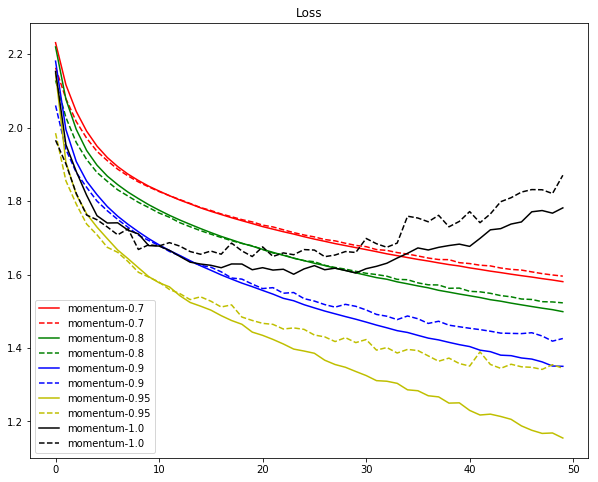

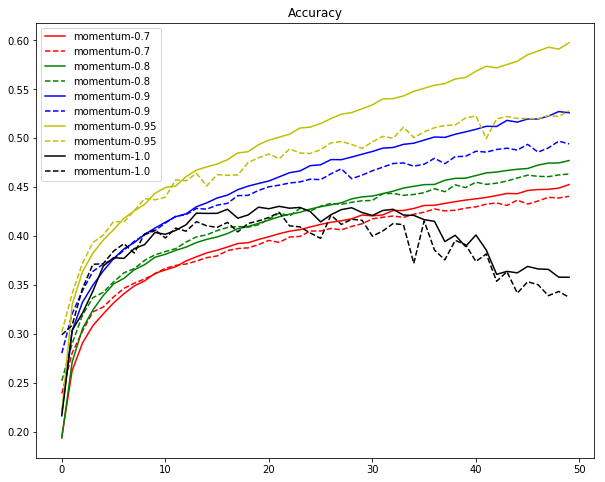

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y","k"]

plt.figure(figsize=(10,8))
for i, cond in enumerate(results_new.keys()):
    plt.plot(range(len(results_new[cond]['train-loss'])),results_new[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_new[cond]['valid-loss'])),results_new[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(10,8))
for i, cond in enumerate(results_new.keys()):
    plt.plot(range(len(results_new[cond]['train-acc'])),results_new[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results_new[cond]['valid-acc'])),results_new[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='best')
plt.show()